In [2]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

In [3]:
# path_to_gen = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2day/agile/0213_CONTROL_borden_syn2day_strength-1.0_ugs-5.0_sf-2.0_2-3_generate-agile_all-control_augs_mask_no-affine_cont/attention_guidance_0/00002.jpg"
# path_to_orig = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenDayRow/grape_detection_californiaday/images/GH010070000525.jpg"
# path_to_gen = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2day/agile/0213_CONTROL_borden_syn2day_strength-1.0_ugs-5.0_sf-2.0_2-3_generate-agile_all-control_augs_mask_no-affine_cont/attention_guidance_0/00003.jpg"
# path_to_orig = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenDayRow/grape_detection_californiaday/splits/train/images/GH010070000316.jpg"

# path_to_gen = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2night/agile/0213_CONTROL_borden_syn2night_strength-0.5_ugs-5.0_sf-2.0_2-5_generate-agile_all-control_augs_mask_no-affine/attention_guidance_0/00005.jpg"
# path_to_orig = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/train/images_subset/091120-Color2-1599682690973009496.jpg"
# path_to_gen = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2night/agile/0213_CONTROL_borden_syn2night_strength-0.5_ugs-5.0_sf-2.0_2-5_generate-agile_all-control_augs_mask_no-affine/attention_guidance_0/00191.jpg"
# path_to_orig = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight/images/091120-Color1-1599682078323729112.jpg"

path_to_gen = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/flower_syn2real/agile/0228_CONTROL_flower_syn2real_token-1_timestep-30_layer-avg_strength-1.0_2-5_generate-agile/attention_guidance_0/resized_camA_cowpea_040_000_1203544_RGB_1_1.jpg"
path_to_orig = "/group/jmearlesgrp/data/AGILE-Datasets/Flower-Detection/Synthetic/splits/train/images/resized_camA_cowpea_040_000_1203544_RGB_1_1.jpg"

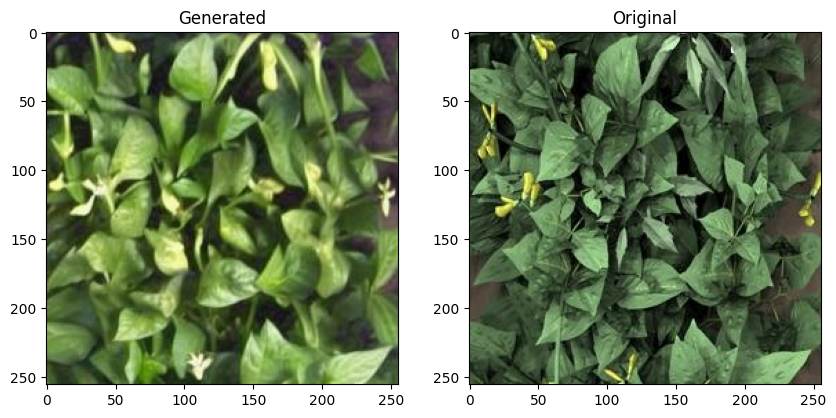

In [4]:
# show both images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(plt.imread(path_to_gen))
axs[0].set_title("Generated")
axs[1].imshow(plt.imread(path_to_orig))
axs[1].set_title("Original")
plt.show()

In [5]:
# get aspect ratio of original image
orig_img = cv2.imread(path_to_orig)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
orig_height, orig_width, _ = orig_img.shape
aspect_ratio = orig_width / orig_height
print(f"Aspect ratio of original image: {aspect_ratio}")

Aspect ratio of original image: 1.0


In [6]:
print(f"orig height: {orig_height}, orig width: {orig_width}")

orig height: 256, orig width: 256


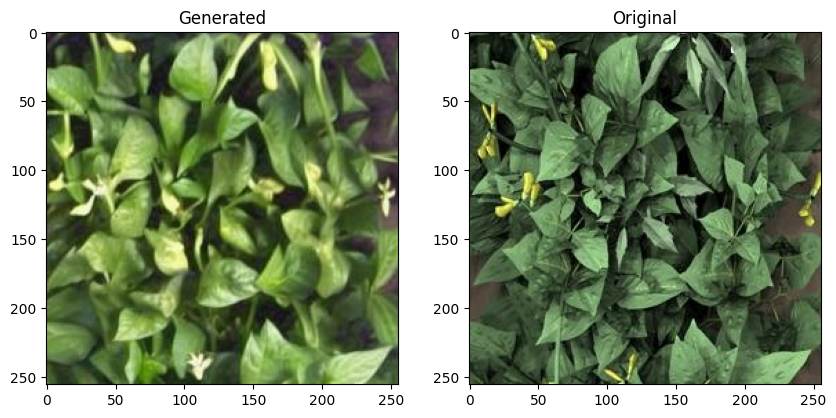

In [7]:
# match aspect ratio of generated image to original image using albumentations
transform = A.Compose([
    A.Resize(height=orig_height, width=orig_width, p=1.0)
])
gen_img = cv2.imread(path_to_gen)
gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
gen_img = transform(image=gen_img)["image"]

# show both images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gen_img)
axs[0].set_title("Generated")
axs[1].imshow(orig_img)
axs[1].set_title("Original")
plt.show()

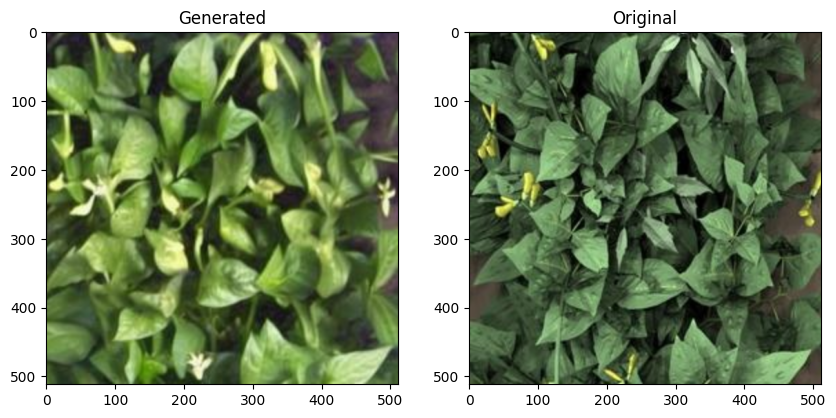

In [8]:
# add padding and resize to 512x512
transform = A.Compose([
    A.Resize(height=512, width=512, p=1.0)
])
gen_img = transform(image=gen_img)["image"]
orig_img = transform(image=orig_img)["image"]

# show both images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gen_img)
axs[0].set_title("Generated")
axs[1].imshow(orig_img)
axs[1].set_title("Original")
plt.show()

In [9]:
gen_img = cv2.imread(path_to_gen)
gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
gen_height, gen_width, _ = gen_img.shape
print(f"gen height: {gen_height}, gen width: {gen_width}")

gen height: 256, gen width: 256


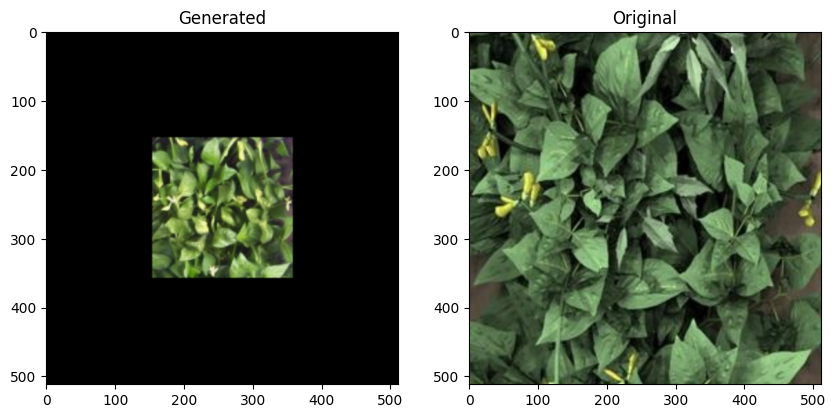

In [10]:
orig_img = cv2.imread(path_to_orig)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
orig_height, orig_width, _ = orig_img.shape

gen_img = cv2.imread(path_to_gen)
gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
gen_height, gen_width, _ = gen_img.shape

transform_train = A.Compose([
    A.OneOf([
        A.PadIfNeeded(
            min_height=int(gen_height * 2.5),
            min_width=int(gen_width * 2.5),
            border_mode=cv2.BORDER_CONSTANT,
            value=0,
            p=0.5
        ),  # shrink (zoom out)
        A.PadIfNeeded(
            min_height=int(gen_height * 1.5),
            min_width=int(gen_width * 1.5),
            border_mode=cv2.BORDER_CONSTANT,
            value=0,
            p=0.5
        ),  # enlarge (zoom in)
    ], p=1.0),
    A.Resize(height=orig_height, width=orig_width, p=1.0), # maintain aspect ratio
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0), # square
    A.Resize(height=512, width=512, p=1.0) # resize for model input
])
transform_test = A.Compose([
    A.Resize(height=orig_height, width=orig_width, p=1.0),
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),
    A.Resize(height=512, width=512, p=1.0)
])
gen_img = cv2.imread(path_to_gen)
gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
orig_img = cv2.imread(path_to_orig)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
gen_img = transform_train(image=gen_img)["image"]
orig_img = transform_test(image=orig_img)["image"]

# show both images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gen_img)
axs[0].set_title("Generated")
axs[1].imshow(orig_img)
axs[1].set_title("Original")
plt.show()

# PACMAP

In [45]:
import os
import cv2
import numpy as np
import torch
import torchvision.transforms as T
import torchvision.models as models
import pacmap
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from PIL import Image
from torch.utils.data import DataLoader
from torchvision.models.feature_extraction import create_feature_extractor
from scipy.linalg import sqrtm

In [46]:
# --- CONFIGURATION ---
SOURCE_PATH = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images"
TARGET_PATH = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenDayRow/grape_detection_californiaday/splits/train/images"
GENERATED_PATH = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2day/agile/0213_CONTROL_borden_syn2day_strength-1.0_ugs-5.0_sf-2.0_2-3_generate-agile_all-control_augs_mask_no-affine_cont/attention_guidance_0"
REMOVE_BLACK_PADDING = False  # Set to False to keep padding
AUGMENT_TARGET = True
AUGMENT_GENERATED = True

device = "cuda" if torch.cuda.is_available() else "cpu"

Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images:   0%|          | 0/300 [00:00<?, ?it/s]

Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images: 100%|██████████| 300/300 [00:01<00:00, 166.02it/s]
Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenDayRow/grape_detection_californiaday/splits/train/images: 100%|██████████| 75/75 [00:04<00:00, 15.63it/s]
Loading /group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2day/agile/0213_CONTROL_borden_syn2day_strength-1.0_ugs-5.0_sf-2.0_2-3_generate-agile_all-control_augs_mask_no-affine_cont/attention_guidance_0: 100%|██████████| 300/300 [00:03<00:00, 91.54it/s]
Applying First Augmentations to Generated Domain: 100%|██████████| 300/300 [00:04<00:00, 62.26it/s]
/home/eranario/miniconda3/envs/lightning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eranario/miniconda3/envs/lightning/lib/python3.10/site-packages/torchvis

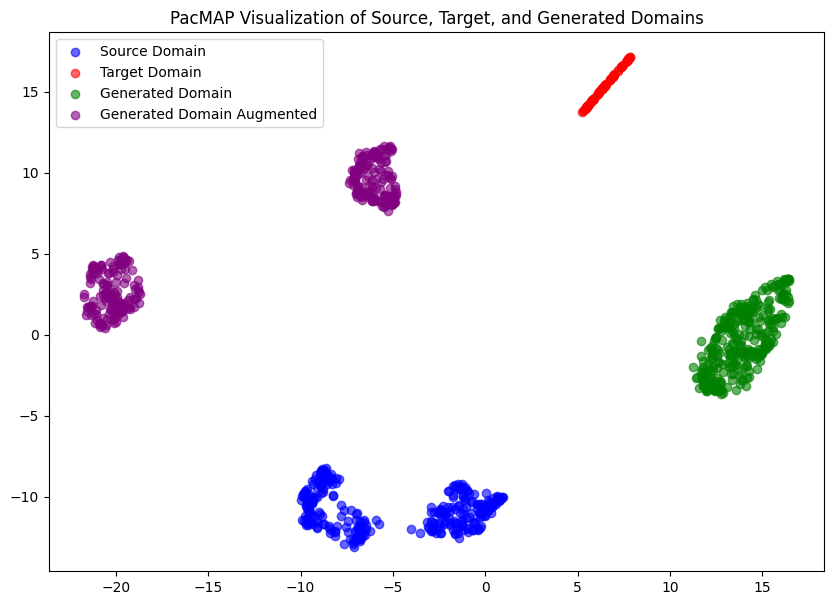

In [48]:
# --- IMAGE PROCESSING ---
def load_images_from_folder(folder, transform=None, max_images=300):
    image_paths = []
    for ext in ["*.png", "*.jpg", "*.jpeg"]:
        image_paths.extend(glob(os.path.join(folder, ext)))

    image_paths = image_paths[:max_images]
    images = []
    
    for img_path in tqdm(image_paths, desc=f"Loading {folder}"):
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip broken images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if transform:
            img = transform(image=np.array(img))["image"]
        else:
            img = T.ToTensor()(img)
        images.append(img)
    
    return torch.stack(images) if images else None, image_paths

# Function to remove black padding
def remove_black_padding(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy()  # Convert to NumPy for processing
    
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    
    coords = np.column_stack(np.where(gray > 0))

    if coords.shape[0] == 0:  # If no non-black pixels found, return original
        return image

    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)

    cropped_image = image[y_min:y_max+1, x_min:x_max+1]

    return cropped_image

# Feature extractor using ResNet18
def extract_features(model, dataloader):
    model.eval()
    features = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Extracting Features"):
            batch = batch.to("cuda" if torch.cuda.is_available() else "cpu")

            # 🔹 Ensure batch is converted to float before passing to ResNet
            batch = batch.float()  

            feature_vector = model(batch).cpu().numpy()
            features.append(feature_vector)

    return np.concatenate(features, axis=0) if features else np.array([])

# --- AUGMENTATION PIPELINE ---
orig_height, orig_width = 2704, 1520  # Modify if needed
gen_height, gen_width = 416, 416  # Modify if needed

# **First augmentation for generated images**
augment_transform = A.Compose([
    A.OneOf([
        A.RandomResizedCrop(height=orig_height, width=orig_width, scale=(0.4, 0.8), ratio=(0.9, 1.1), p=0.5),
        A.PadIfNeeded(min_height=int(gen_height * 1.3), min_width=int(gen_width * 1.3), border_mode=cv2.BORDER_CONSTANT, value=0, p=0.5),
    ], p=1.0),
    A.Resize(height=orig_height, width=orig_width, p=1.0),
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),
    A.Resize(height=512, width=512, p=1.0),
    ToTensorV2(),
])

# **Second augmentation (Your `transform_test`)**
transform_test = A.Compose([
    A.Resize(height=orig_height, width=orig_width, p=1.0),
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),
    A.Resize(height=512, width=512, p=1.0),
    ToTensorV2(),
])

# --- LOAD DATA ---
source_imgs, _ = load_images_from_folder(SOURCE_PATH)
target_imgs, target_paths = load_images_from_folder(TARGET_PATH, transform_test if AUGMENT_TARGET else None)  # Apply transform_test to target
generated_imgs, gen_paths = load_images_from_folder(GENERATED_PATH, transform_test if AUGMENT_GENERATED else None)  # Apply transform_test to generated

# --- APPLY FIRST AUGMENTATION TO GENERATED IMAGES ---
if AUGMENT_GENERATED:
    augmented_generated_images = []
    for img_path in tqdm(gen_paths, desc="Applying First Augmentations to Generated Domain"):
        img = cv2.imread(img_path)
        if img is None:
            continue  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        augmented_img = augment_transform(image=img)["image"]
        augmented_img = augmented_img.float() / 255.0  # Normalize

        augmented_generated_images.append(augmented_img)

    if augmented_generated_images:
        generated_aug1_imgs = torch.stack(augmented_generated_images)

# --- Feature Extraction using InceptionV3 ---
inception_model = models.inception_v3(pretrained=True, transform_input=False).to(device).eval()

def get_features(images, model, batch_size=32):
    """Extract features from InceptionV3's pool3 layer."""
    feature_extractor = create_feature_extractor(model, return_nodes={"avgpool": "pool3"}).to(device)
    features = []
    
    dataloader = DataLoader(images, batch_size=batch_size)
    for batch in tqdm(dataloader, desc="Extracting Features"):
        batch = batch.to(device)

        # 🔹 Ensure batch is converted to float before passing to InceptionV3
        batch = batch.float()  

        # Normalize images to [-1,1] before InceptionV3
        batch = batch * 2 - 1  

        with torch.no_grad():
            outputs = feature_extractor(batch)
            preds = outputs["pool3"]

        features.append(preds.squeeze(-1).squeeze(-1).cpu().numpy())

    return np.concatenate(features, axis=0)

source_feats = get_features(source_imgs, inception_model)
target_feats = get_features(target_imgs, inception_model)
generated_feats = get_features(generated_imgs, inception_model)
augmented_generated_feats = get_features(generated_aug1_imgs, inception_model)

# --- APPLY PACMAP ---
pacmap_model = pacmap.PaCMAP(n_components=2, n_neighbors=10, random_state=42)
all_features = np.concatenate([source_feats, target_feats, generated_feats, augmented_generated_feats], axis=0)
embedding = pacmap_model.fit_transform(all_features)

# --- Split PacMAP Embeddings ---
n1, n2, n3, n4 = len(source_feats), len(target_feats), len(generated_feats), len(augmented_generated_feats)
source_emb, target_emb, generated_emb, augmented_generated_emb = np.split(embedding, [n1, n1 + n2, n1 + n2 + n3])

# --- VISUALIZE RESULTS ---
plt.figure(figsize=(10, 7))
plt.scatter(source_emb[:, 0], source_emb[:, 1], c='blue', label="Source Domain", alpha=0.6)
plt.scatter(target_emb[:, 0], target_emb[:, 1], c='red', label="Target Domain", alpha=0.6)
plt.scatter(generated_emb[:, 0], generated_emb[:, 1], c='green', label="Generated Domain", alpha=0.6)
plt.scatter(augmented_generated_emb[:, 0], augmented_generated_emb[:, 1], c='purple', label="Generated Domain Augmented", alpha=0.6)

plt.legend()
plt.title("PacMAP Visualization of Source, Target, and Generated Domains")
plt.show()

In [49]:
# --- CONFIGURATION ---
SOURCE_PATH = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images"
TARGET_PATH = "/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight/splits/train/images"
GENERATED_PATH = "/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2night/agile/0218_CONTROL_borden_syn2night_strength-0.5_ugs-5.0_sf-4.0_2-5_generate-agile_all-control_augs_mask_no-affine/attention_guidance_0"
REMOVE_BLACK_PADDING = False  # Set to False to keep padding
AUGMENT_TARGET = True
AUGMENT_GENERATED = True

device = "cuda" if torch.cuda.is_available() else "cpu"

Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images:   0%|          | 0/300 [00:00<?, ?it/s]

Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/images: 100%|██████████| 300/300 [00:01<00:00, 165.58it/s]
Loading /group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/BordenNight/grape_detection_californianight/splits/train/images: 100%|██████████| 89/89 [00:03<00:00, 23.23it/s]
Loading /group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2night/agile/0218_CONTROL_borden_syn2night_strength-0.5_ugs-5.0_sf-4.0_2-5_generate-agile_all-control_augs_mask_no-affine/attention_guidance_0: 100%|██████████| 300/300 [00:09<00:00, 31.83it/s]
Applying First Augmentations to Generated Domain: 100%|██████████| 300/300 [00:03<00:00, 93.94it/s] 
/home/eranario/miniconda3/envs/lightning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eranario/miniconda3/envs/lightning/lib/python3.10/site-packages/torchvi

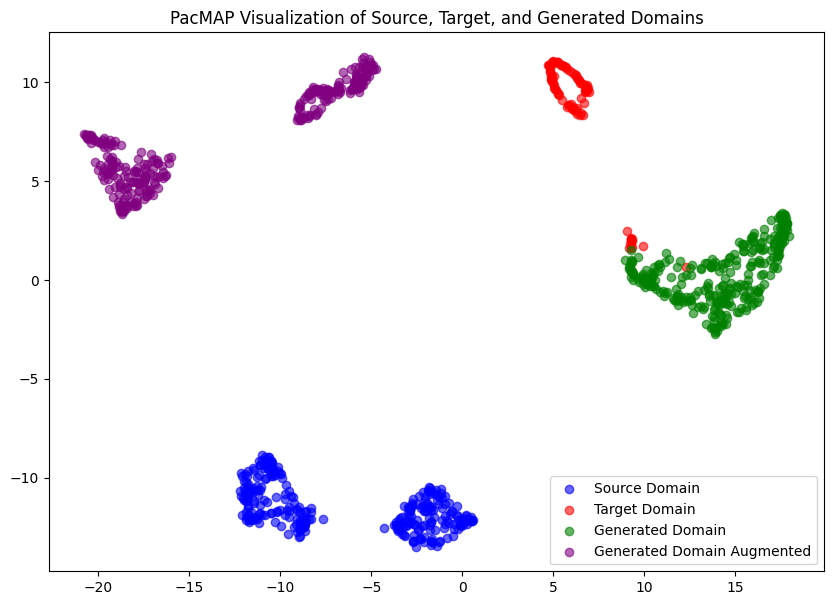

In [50]:
# --- IMAGE PROCESSING ---
def load_images_from_folder(folder, transform=None, max_images=300):
    image_paths = []
    for ext in ["*.png", "*.jpg", "*.jpeg"]:
        image_paths.extend(glob(os.path.join(folder, ext)))

    image_paths = image_paths[:max_images]
    images = []
    
    for img_path in tqdm(image_paths, desc=f"Loading {folder}"):
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip broken images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if transform:
            img = transform(image=np.array(img))["image"]
        else:
            img = T.ToTensor()(img)
        images.append(img)
    
    return torch.stack(images) if images else None, image_paths

# Function to remove black padding
def remove_black_padding(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy()  # Convert to NumPy for processing
    
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    
    coords = np.column_stack(np.where(gray > 0))

    if coords.shape[0] == 0:  # If no non-black pixels found, return original
        return image

    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)

    cropped_image = image[y_min:y_max+1, x_min:x_max+1]

    return cropped_image

# Feature extractor using ResNet18
def extract_features(model, dataloader):
    model.eval()
    features = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Extracting Features"):
            batch = batch.to("cuda" if torch.cuda.is_available() else "cpu")

            # 🔹 Ensure batch is converted to float before passing to ResNet
            batch = batch.float()  

            feature_vector = model(batch).cpu().numpy()
            features.append(feature_vector)

    return np.concatenate(features, axis=0) if features else np.array([])

# --- AUGMENTATION PIPELINE ---
orig_height, orig_width = 1280, 720  # Modify if needed
gen_height, gen_width = 416, 416  # Modify if needed

# **First augmentation for generated images**
augment_transform = A.Compose([
    A.OneOf([
        A.RandomResizedCrop(height=orig_height, width=orig_width, scale=(0.4, 0.8), ratio=(0.9, 1.1), p=0.5),
        A.PadIfNeeded(min_height=int(gen_height * 1.3), min_width=int(gen_width * 1.3), border_mode=cv2.BORDER_CONSTANT, value=0, p=0.5),
    ], p=1.0),
    A.Resize(height=orig_height, width=orig_width, p=1.0),
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),
    A.Resize(height=512, width=512, p=1.0),
    ToTensorV2(),
])

# **Second augmentation (Your `transform_test`)**
transform_test = A.Compose([
    A.Resize(height=orig_height, width=orig_width, p=1.0),
    A.PadIfNeeded(min_height=orig_height, min_width=orig_height, border_mode=cv2.BORDER_CONSTANT, value=0, p=1.0),
    A.Resize(height=512, width=512, p=1.0),
    ToTensorV2(),
])

# --- LOAD DATA ---
source_imgs, _ = load_images_from_folder(SOURCE_PATH)
target_imgs, target_paths = load_images_from_folder(TARGET_PATH, transform_test if AUGMENT_TARGET else None)  # Apply transform_test to target
generated_imgs, gen_paths = load_images_from_folder(GENERATED_PATH, transform_test if AUGMENT_GENERATED else None)  # Apply transform_test to generated

# --- APPLY FIRST AUGMENTATION TO GENERATED IMAGES ---
if AUGMENT_GENERATED:
    augmented_generated_images = []
    for img_path in tqdm(gen_paths, desc="Applying First Augmentations to Generated Domain"):
        img = cv2.imread(img_path)
        if img is None:
            continue  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        augmented_img = augment_transform(image=img)["image"]
        augmented_img = augmented_img.float() / 255.0  # Normalize

        augmented_generated_images.append(augmented_img)

    if augmented_generated_images:
        generated_aug1_imgs = torch.stack(augmented_generated_images)

# --- Feature Extraction using InceptionV3 ---
inception_model = models.inception_v3(pretrained=True, transform_input=False).to(device).eval()

def get_features(images, model, batch_size=32):
    """Extract features from InceptionV3's pool3 layer."""
    feature_extractor = create_feature_extractor(model, return_nodes={"avgpool": "pool3"}).to(device)
    features = []
    
    dataloader = DataLoader(images, batch_size=batch_size)
    for batch in tqdm(dataloader, desc="Extracting Features"):
        batch = batch.to(device)

        # 🔹 Ensure batch is converted to float before passing to InceptionV3
        batch = batch.float()  

        # Normalize images to [-1,1] before InceptionV3
        batch = batch * 2 - 1  

        with torch.no_grad():
            outputs = feature_extractor(batch)
            preds = outputs["pool3"]

        features.append(preds.squeeze(-1).squeeze(-1).cpu().numpy())

    return np.concatenate(features, axis=0)

source_feats = get_features(source_imgs, inception_model)
target_feats = get_features(target_imgs, inception_model)
generated_feats = get_features(generated_imgs, inception_model)
augmented_generated_feats = get_features(generated_aug1_imgs, inception_model)

# --- APPLY PACMAP ---
pacmap_model = pacmap.PaCMAP(n_components=2, n_neighbors=10, random_state=42)
all_features = np.concatenate([source_feats, target_feats, generated_feats, augmented_generated_feats], axis=0)
embedding = pacmap_model.fit_transform(all_features)

# --- Split PacMAP Embeddings ---
n1, n2, n3, n4 = len(source_feats), len(target_feats), len(generated_feats), len(augmented_generated_feats)
source_emb, target_emb, generated_emb, augmented_generated_emb = np.split(embedding, [n1, n1 + n2, n1 + n2 + n3])

# --- VISUALIZE RESULTS ---
plt.figure(figsize=(10, 7))
plt.scatter(source_emb[:, 0], source_emb[:, 1], c='blue', label="Source Domain", alpha=0.6)
plt.scatter(target_emb[:, 0], target_emb[:, 1], c='red', label="Target Domain", alpha=0.6)
plt.scatter(generated_emb[:, 0], generated_emb[:, 1], c='green', label="Generated Domain", alpha=0.6)
plt.scatter(augmented_generated_emb[:, 0], augmented_generated_emb[:, 1], c='purple', label="Generated Domain Augmented", alpha=0.6)

plt.legend()
plt.title("PacMAP Visualization of Source, Target, and Generated Domains")
plt.show()